In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E:\\python_Training\\linear regression\\Dummy Encoding\\carprices.csv')
print(df)

                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5


In [5]:
df_dummies=pd.get_dummies(df['Car Model']).astype(int)
df_dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [8]:
data=pd.concat([df, df_dummies], axis=1)
data

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [9]:
data=data.drop(['Car Model'], axis=1)
data

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [12]:
X=data.drop(['Sell Price($)'], axis=1)
X

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [13]:
y=data['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03,  6.10375284e+02, -3.67429130e+03,
        3.06391602e+03])

In [16]:
model.intercept_

55912.70994756204

<function matplotlib.pyplot.show(close=None, block=None)>

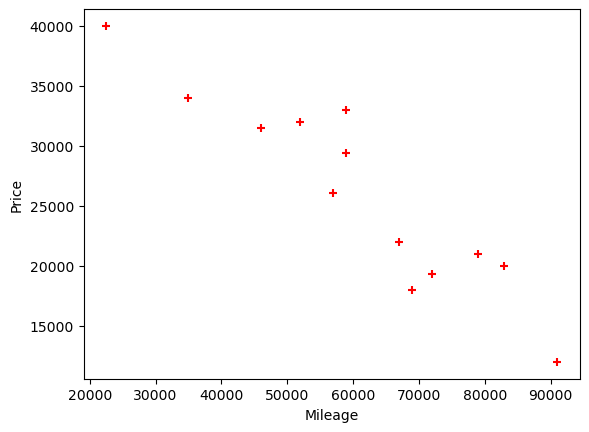

In [17]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.scatter(data.Mileage, data['Sell Price($)'], color='red', marker='+')
plt.show

In [18]:
model.predict([[45000,4,0,0,1]])

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

<function matplotlib.pyplot.show(close=None, block=None)>

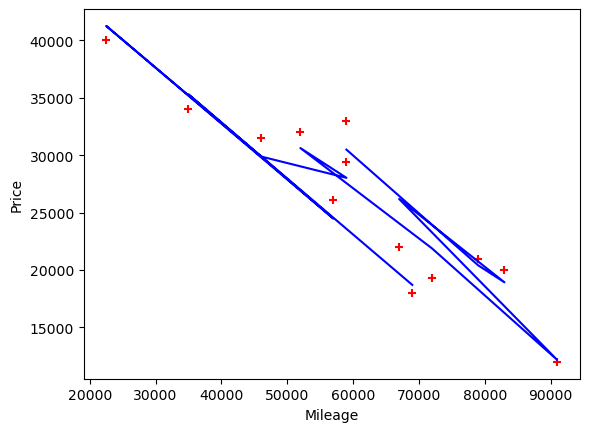

In [26]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.scatter(data.Mileage, data['Sell Price($)'], color='red', marker='+')
plt.plot(data.Mileage, model.predict(X), color='blue')
plt.show

In [27]:
model.predict([[86000, 7, 0,1,0]])

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [28]:
model.score(X,y)

0.9417050937281082

In [29]:
data.corr()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
Mileage,1.000000,-0.927116,0.993452,0.275426,-0.642673,0.402011
Sell Price($),-0.927116,1.000000,-0.921741,-0.246918,0.400640,-0.175394
Age(yrs),0.993452,-0.921741,1.000000,0.290701,-0.651155,0.395676
Audi A5,0.275426,-0.246918,0.290701,1.000000,-0.527046,-0.444444
BMW X5,-0.642673,0.400640,-0.651155,-0.527046,1.000000,-0.527046
Mercedez Benz C class,0.402011,-0.175394,0.395676,-0.444444,-0.527046,1.000000


In [31]:
data.describe()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692,0.307692,0.384615,0.307692
std,19185.665055,8003.661021,1.652504,0.480384,0.506370,0.480384
min,22500.000000,12000.000000,2.000000,0.000000,0.000000,0.000000
25%,52000.000000,20000.000000,5.000000,0.000000,0.000000,0.000000
50%,59000.000000,26100.000000,5.000000,0.000000,0.000000,0.000000
75%,72000.000000,32000.000000,6.000000,1.000000,1.000000,1.000000
max,91000.000000,40000.000000,8.000000,1.000000,1.000000,1.000000


<Axes: >

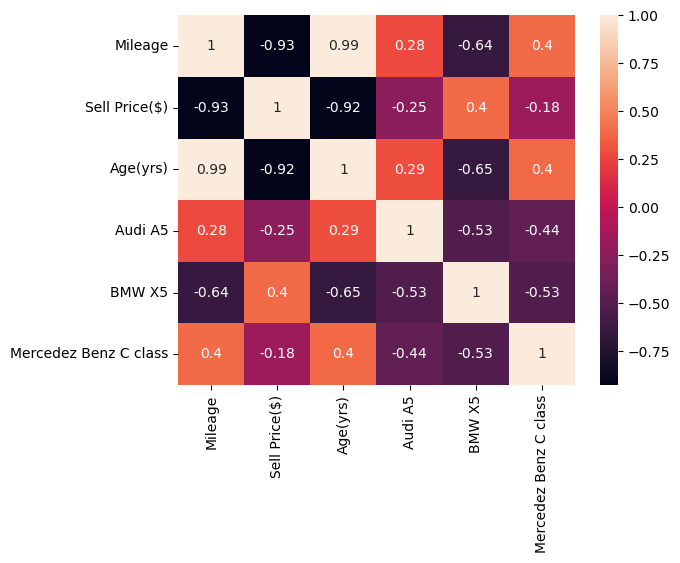

In [32]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True)